# Sales prediciton:
    Predict sale of each particular product at every store

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# load in the data
big_mart_df = pd.read_csv('./data.csv')

In [11]:
big_mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


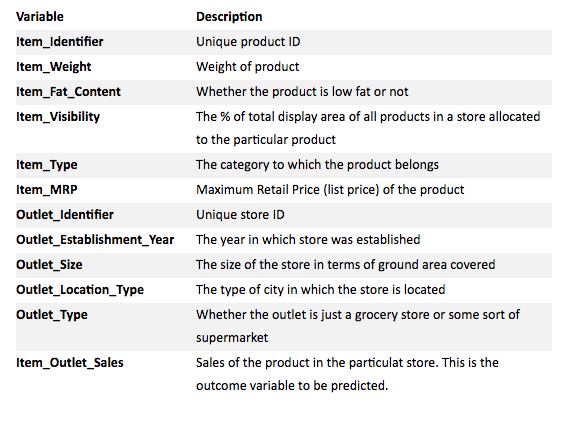

# Data Exploration and preparation:

In [12]:
# 1. Know the data types
big_mart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
big_mart_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [18]:
# 2. univariate Analysis
from scipy.stats.mstats import mode
def get_descriptive_stats_continuous(input_df, column):
    """
    Function to print the descriptive statics of a give dataframe
    
    @Params:
        input_df: the input data frame which contains a column whose descriptive statics is to be calculated
        column: the name of the column whose descriptive statics is to be calculated.
        
    @Returns:
        desc_stat: a dictionary with the descriptive statistics
    """
    KEY_ORDER = ['count', 'min', 'max', 'mean', 'median','mode', 'std', 'variance', '25%', '50%', '75%', 'NaN_perc']
    desc_stat = {}
    desc_stat = input_df[column].describe().to_dict()
    desc_stat['variance'] = input_df[column].var()
    desc_stat['median'] = input_df[column].median()
    desc_stat['mode'] = mode(input_df[column])[0][0]
    desc_stat['NaN_perc'] = str(input_df[column].isnull().sum() / desc_stat['count']) + '%'
    print('---------------------DESCRIPTIVE STATICS---------------------')
    for key in KEY_ORDER:
        print(key +': '+str(desc_stat[key]) )
    print('-------------------------------------------------------------')
    return desc_stat